In [ ]:
# 如何标记和引用时间序列数据取决于应用程序，并且您可能有以下其中一项：
# · 时间戳，具体的时刻。
# · 固定的时间区间，例如2007的1月或整个2010年。
# · 时间间隔，由开始和结束时间戳表示。时间区间可以被认为是间隔的特殊情况。
# · 实验时间或消耗时间。每个时间戳是相对于特定开始时间的时间的量度（例如，自从被放置在烤箱中每秒烘烤的饼干的直径）。

In [ ]:
# 11.1 日期和时间数据的类型及工具
# datetime、time和calendar模块是开始处理时间数据的主要内容。datetime.datetime类型，或简写为datetime，是广泛使用的：

In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
from dateutil.parser import parse
import numpy as np

In [3]:
now=datetime.now()
now  # 返回当前时间

datetime.datetime(2023, 10, 24, 20, 52, 46, 654568)

In [4]:
now.year,now.month,now.day

(2023, 10, 24)

In [9]:
# delta返回当前的时间差
delta=datetime(2011,1,1)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=920, seconds=56700)

In [10]:
delta.days  #926

920

In [11]:
delta.seconds  #56700

56700

In [12]:
# 你可以为一个datetime对象加上（或减去）一个timedelta或其整数倍来产生一个新的datetime对象：
start=datetime(2011,1,7)
start+timedelta(12)  #2011-01-19 00:00:00

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start-2*timedelta(12) #2010-12-14 00:00:00

datetime.datetime(2010, 12, 14, 0, 0)

In [14]:
# 11.1.1 字符串与datetime互相转换
stamp=datetime(2011,1,3)
str(stamp) #2011-01-03 00:00:00

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')  #2011-01-03

'2011-01-03'

In [16]:
# 你可以使用datetime.srtptime和这些格式代码，将字符串转换日期：
value='2011-01-03'
datetime.strptime(value,'%Y-%m-%d')                   #2011-01-03 00:00:00

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]   #[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [18]:
# datetime.strptime是在已知格式的情况下转换日期的好方式。然而，每次都必须编写一个格式代码可能有点烦人，特别是对于通用日期格式。
# 在这种情况下，你可以使用第三方dateutil包的parser.parse方法（这个包在安装pandas时已经自动安装）
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
# dateutil能够解析大部分分类可以理解的日期表示
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2023, 1, 31, 22, 45)

In [20]:
# 在国际场合下，日期出现在月份之前很常见，因此你可以传递dayfirst=True来表明这种情况：
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [21]:
# pandas主要是面向处理日期数组的，无论是用作轴索引还是用作DataFrame中的列。to_datetime方法可以转换很多不同的日期表示格式
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [23]:
# to_datetime方法还可以处理那些被认为是缺失值的值(None,空字符串)
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2]   # NaT  NaT（Not a time）是pandas中时间戳数据的是null值。

NaT

In [25]:
pd.isnull(idx)    #[False False  True]

array([False, False,  True])

In [27]:
# 11.2时间序列基础
# pandas中的基础时间序列种类是由时间戳索引的Series，在pandas外部则通常表示为Python字符串或datetime对象：
dates=[datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),
       datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02    0.271580
2011-01-05    1.010289
2011-01-07    0.423683
2011-01-08   -0.744459
2011-01-10   -0.303909
2011-01-12   -0.510376
dtype: float64

In [28]:
# 这些datetime对象可以被放入DatetimeIndex中：
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
# 和其他Series类似，不同索引的时间序列之间的算术运算在日期上自动对齐：
ts+ts[::2]  #ts[::2]会将ts中每隔一个的元素选择出。

2011-01-02    0.543160
2011-01-05         NaN
2011-01-07    0.847365
2011-01-08         NaN
2011-01-10   -0.607818
2011-01-12         NaN
dtype: float64

In [31]:
# pandas使用NumPy的datetime64数据类型在纳秒级的分辨率下存储时间戳：
ts.index.dtype

dtype('<M8[ns]')

In [33]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [35]:
# 11.2.1 索引、选择、子集
# 当你基于标签进行索引和选择时，时间序列的行为和其他的pandas.Series类似：
stamp=ts.index[2]
ts[stamp]

0.42368266541131383

In [36]:
# 还可以传递一个能解释为日期的字符串
ts['1/10/2011']

-0.3039092188887273

In [37]:
ts['20110110']

-0.3039092188887273

In [40]:
# 对一个长的时间序列，可以传递一个年份或一个年份和月份来轻松地选择数据的切片：
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -0.318313
2000-01-02   -0.427608
2000-01-03    2.228414
2000-01-04    1.175354
2000-01-05    1.051563
                ...   
2002-09-22    0.802631
2002-09-23   -0.160985
2002-09-24   -1.390441
2002-09-25   -0.710825
2002-09-26   -1.153323
Freq: D, Length: 1000, dtype: float64

In [41]:
longer_ts['2001']

2001-01-01   -1.027539
2001-01-02   -0.641867
2001-01-03    0.178581
2001-01-04    0.614443
2001-01-05    1.514661
                ...   
2001-12-27    1.154761
2001-12-28   -0.097984
2001-12-29   -0.913858
2001-12-30    1.075727
2001-12-31   -1.054118
Freq: D, Length: 365, dtype: float64

In [42]:
# 字符串’2001’被解释为一个年份，并选择了相应的时间区间。如果你指定了月份也是有效的：
longer_ts['2001-05']

2001-05-01    0.785198
2001-05-02   -0.146842
2001-05-03   -1.360611
2001-05-04    1.204388
2001-05-05    0.623133
2001-05-06   -1.200034
2001-05-07    0.022667
2001-05-08   -0.151890
2001-05-09    2.297447
2001-05-10   -0.536667
2001-05-11   -0.506555
2001-05-12    1.022165
2001-05-13    0.219418
2001-05-14    0.818199
2001-05-15   -1.289150
2001-05-16    1.393778
2001-05-17   -0.199287
2001-05-18    0.440229
2001-05-19   -1.249942
2001-05-20    0.974777
2001-05-21    0.835739
2001-05-22   -0.182810
2001-05-23   -0.335357
2001-05-24    0.525352
2001-05-25    1.983179
2001-05-26   -0.573558
2001-05-27   -0.192986
2001-05-28    1.333590
2001-05-29   -0.230732
2001-05-30   -0.836485
2001-05-31   -0.875925
Freq: D, dtype: float64

In [44]:
# 也可以使用datetime对象进行切片
ts[datetime(2011,1,7):]

2011-01-07    0.423683
2011-01-08   -0.744459
2011-01-10   -0.303909
2011-01-12   -0.510376
dtype: float64

In [45]:
# 大部分时间序列数据是按时间顺序排序的，可以使用不包含在时间序列中的时间戳进行切片，以执行范围查询
ts

2011-01-02    0.271580
2011-01-05    1.010289
2011-01-07    0.423683
2011-01-08   -0.744459
2011-01-10   -0.303909
2011-01-12   -0.510376
dtype: float64

In [46]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.423683
2011-01-08   -0.744459
2011-01-10   -0.303909
dtype: float64

In [48]:
# 和之前一样，你可以传递一个字符串的日期、datetime对象或者时间戳。请记住通过这种方式的切片产生了原时间序列的视图，类似于NumPy的数组。这意味着没有数据被复制，并且在切片上的修改会反映在原始数据上
# 有一个等价实例方法，truncate，它可以在两个日期间对Series进行切片：
ts.truncate(after='1/9/2011')

2011-01-02    0.271580
2011-01-05    1.010289
2011-01-07    0.423683
2011-01-08   -0.744459
dtype: float64

In [52]:
# 上面这些操作也都适用于DataFrame，并在其行上进行索引：
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','New York','Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.041805,-1.233562,-0.233392,-1.470018
2001-05-09,1.356494,-1.603719,1.600172,1.851263
2001-05-16,-1.391093,0.455580,-1.133291,1.197910
2001-05-23,-0.444169,-0.303375,0.135583,-0.750504
2001-05-30,1.114743,0.273048,0.658442,-0.038720


In [54]:
# 11.2.2含有重复索引的时间序列
# 在某些应用中，可能会有多个数据观察值落在特定的时间戳上
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [55]:
# 通过检查索引的is_unique属性，我们可以看出索引并不是唯一的：
dup_ts.index.is_unique

False

In [56]:
# 对上面的Series进行索引，结果是标量值还是Series切片取决于是否有时间戳是重复的：
dup_ts['1/3/2000']

4

In [57]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [58]:
# 假设你想要聚合含有非唯一时间戳的数据。一种方式就是使用groupby并传递level=0：
grouped=dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [59]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [60]:
# 11.3 日期范围、频率和移位
# pandas的通用时间序列是不规则的，即时间序列的频率不是固定的。对于很多应用来说，这足够了。然而，经常有需要处理固定频率的场景，例如每日的、每月的或每15分钟，这意味着我们甚至需要在必要的时候向时间序列中引入缺失值。幸运的是， pandas拥有一整套标准的时间序列频率和工具用于重新采样、推断频率以及生成固定频率的数据范围。例如，你可以通过调用resample方法将样本时间序列转换为固定的每日频率数据
ts

2011-01-02    0.271580
2011-01-05    1.010289
2011-01-07    0.423683
2011-01-08   -0.744459
2011-01-10   -0.303909
2011-01-12   -0.510376
dtype: float64

In [62]:
# 字符串‘D’解释为每日频率
resampler=ts.resample('D')
# 频率转换，称为重新采样，在11.6讲解

In [63]:
# 11.3.1生成日期范围
# pandas.date_range是用于根据特定频率生成指定长度的DatetimeIndex：
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [64]:
# 默认情况下，date_range生成的是每日的时间戳。如果你只传递一个起始或结尾日期，你必须传递一个用于生成范围的数字：
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [66]:
# 开始日期和结束日期严格定义了生成日期索引的边界。例如，如果你需要一个包含每月最后业务日期的时间索引，你可以传递’BM’频率（business end of month ，月度业务结尾；参考表11-4的频率列表），只有落在或在日期范围内的日期会被包括：
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [67]:
# 默认情况下，date_range保留开始或结束时间戳的时间（如果有的话）：
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [70]:
# 有时候你会获得包含时间信息的开始日期或结束日期，但是你想要生成的是标准化为零点的时间戳。有一个normalize选项可以实现这个功能：
pd.date_range('2012-06-12 12:56:21',periods=5,normalize=True)

DatetimeIndex(['2012-06-12', '2012-06-13', '2012-06-14', '2012-06-15',
               '2012-06-16'],
              dtype='datetime64[ns]', freq='D')

In [1]:
# 11.3.2 频率和日期偏置
# pandas中的频率是由基础频率和倍数组成的。基础频率通常会有字符串别名，例如’M'代表每月，'H’代表每小时。对于每个基础频率，都有一个对象可以被用于定义日期偏置。例如，每小时的频率可以使用Hour类来表示：
from pandas.tseries.offsets import Hour,Minute
hour=Hour
hour

pandas._libs.tslibs.offsets.Hour

In [3]:
# 你可以专递一个整数来定义偏置量的倍数
four_hours=Hour(4)
four_hours

<4 * Hours>

In [7]:
# 在大多数应用中，你都不需要显式地创建这些对象，而是使用字符串别名，如’H'或’4H'。在基础频率前放一个整数就可以生成倍数：
import pandas as pd
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [8]:
# 多个偏置可以通过加法进行联合
Hour(2)+Minute(30)

<150 * Minutes>

In [9]:
# 类似地，你可以传递频率字符串，例如’1h30min’将会有效地转换为同等的表达式
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [11]:
# 有些频率描述点的时间并不是均匀分隔的。例如，'M'（日历月末）和’BM'（月内最后工作日）取决于当月天数，以及像之后的例子中，取决于月末是否是周末。我们将这些日期称为锚定偏置量
# 11.3.2.1月中某星期的日期
# "月中某星期"（week of month ）的日期是一个有用的频率类，以’WOM’开始。它允许你可以获取每月第三个星期五这样的日期：
rng=pd.date_range('2022-10-01','2023-10-01',freq='WOM-3FRI')
list(rng)

[Timestamp('2022-10-21 00:00:00'),
 Timestamp('2022-11-18 00:00:00'),
 Timestamp('2022-12-16 00:00:00'),
 Timestamp('2023-01-20 00:00:00'),
 Timestamp('2023-02-17 00:00:00'),
 Timestamp('2023-03-17 00:00:00'),
 Timestamp('2023-04-21 00:00:00'),
 Timestamp('2023-05-19 00:00:00'),
 Timestamp('2023-06-16 00:00:00'),
 Timestamp('2023-07-21 00:00:00'),
 Timestamp('2023-08-18 00:00:00'),
 Timestamp('2023-09-15 00:00:00')]

In [23]:
# 11.3.3移位(前向和后向)日期
# "移位"是指将日期按时间向前移动或向后移动。Series和DataFrame都有一个shift方法用于进行简单的前向或后向移位，而不改变索引：
import numpy as np
ts=pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31    0.669049
2000-02-29    1.288298
2000-03-31   -0.043836
2000-04-30    0.319511
Freq: M, dtype: float64

In [24]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.669049
2000-04-30    1.288298
Freq: M, dtype: float64

In [25]:
ts.shift(-2)

2000-01-31   -0.043836
2000-02-29    0.319511
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [26]:
# shift常用于计算时间序列或DataFrame多列时间序列的百分比变化，代码实现如下
ts / ts.shift(1)-1

2000-01-31         NaN
2000-02-29    0.925566
2000-03-31   -1.034026
2000-04-30   -8.288793
Freq: M, dtype: float64

In [27]:
# 由于简单移位并不改变索引，一些数据会被丢弃。因此，如果频率是已知的，则可以将频率传递给shift来推移时间戳而不是简单的数据：
ts.shift(2,freq='M')

2000-03-31    0.669049
2000-04-30    1.288298
2000-05-31   -0.043836
2000-06-30    0.319511
Freq: M, dtype: float64

In [28]:
# 其他的频率也可以传递，为你前移和后移数据提供灵活性：
ts.shift(3,freq='D')

2000-02-03    0.669049
2000-03-03    1.288298
2000-04-03   -0.043836
2000-05-03    0.319511
dtype: float64

In [29]:
# 这里的T代表分钟
ts.shift(3,freq='90T')

2000-01-31 04:30:00    0.669049
2000-02-29 04:30:00    1.288298
2000-03-31 04:30:00   -0.043836
2000-04-30 04:30:00    0.319511
dtype: float64

In [34]:
# 11.3.3.1使用偏置进行移位日期
# pandas日期偏置也可以使用datetime或Timestamp对象完成：
from pandas.tseries.offsets import Day,MonthEnd
from datetime import datetime
now=datetime(2023,10,17)
now+3*Day()

Timestamp('2023-10-20 00:00:00')

In [35]:
# 如果你添加了一个锚定偏置量，比如MonthEnd，根据频率规则，第一个增量会将日期“前滚”到下一个日期：
now+MonthEnd()

Timestamp('2023-10-31 00:00:00')

In [36]:
now+MonthEnd(2)

Timestamp('2023-11-30 00:00:00')

In [38]:
# 锚定偏置可以使用rollforward和rollback分别显式地将日期向前或向后"滚动"：
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2023-10-31 00:00:00')

In [39]:
offset.rollback(now)

Timestamp('2023-09-30 00:00:00')

In [40]:
# 将移位方法与groupby一起使用是日期偏置的一种创造性用法：
ts=pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15   -0.192494
2000-01-19   -0.380824
2000-01-23   -0.660382
2000-01-27   -1.524368
2000-01-31   -0.321683
2000-02-04   -1.412673
2000-02-08    0.564138
2000-02-12   -0.321103
2000-02-16    0.745393
2000-02-20    0.310571
2000-02-24    0.345605
2000-02-28   -0.250677
2000-03-03   -0.230603
2000-03-07    0.036611
2000-03-11    0.669411
2000-03-15   -0.021947
2000-03-19    1.399523
2000-03-23    0.444085
2000-03-27   -0.196664
2000-03-31    1.160556
Freq: 4D, dtype: float64

In [41]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.615950
2000-02-29   -0.002678
2000-03-31    0.407622
dtype: float64

In [42]:
# 当然，使用resample是更简单更快捷的方法（我们将在11.6节中深入讨论resample）
ts.resample('M').mean()

2000-01-31   -0.615950
2000-02-29   -0.002678
2000-03-31    0.407622
Freq: M, dtype: float64

In [43]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [44]:
# 要获得pytz的时区对象，可使用pytz.timezone：
tz=pytz.timezone('America/New_York')
tz
# pandas中的方法可以接收时区名称或时区对象。

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [47]:
# 11.4.1时区的本地化和转换
# 默认情况下，pandas中的时间序列是时区简单型的。例如，考虑下面的时间序列：
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.894754
2012-03-10 09:30:00    1.845774
2012-03-11 09:30:00    0.787380
2012-03-12 09:30:00   -0.195935
2012-03-13 09:30:00   -0.031655
2012-03-14 09:30:00   -0.446782
Freq: D, dtype: float64

In [48]:
# 索引tz的属性是None
print(ts.index.tz)

None


In [49]:
# 日期范围可以通过时区集合来生成
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [50]:
# 使用tz_localize方法可以从简单时区转换到本地化时区：
ts

2012-03-09 09:30:00   -0.894754
2012-03-10 09:30:00    1.845774
2012-03-11 09:30:00    0.787380
2012-03-12 09:30:00   -0.195935
2012-03-13 09:30:00   -0.031655
2012-03-14 09:30:00   -0.446782
Freq: D, dtype: float64

In [51]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.894754
2012-03-10 09:30:00+00:00    1.845774
2012-03-11 09:30:00+00:00    0.787380
2012-03-12 09:30:00+00:00   -0.195935
2012-03-13 09:30:00+00:00   -0.031655
2012-03-14 09:30:00+00:00   -0.446782
Freq: D, dtype: float64

In [52]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [53]:
# 一旦时间序列被本地化为某个特定的时区，则可以通过tz_convert将其转换为另一个时区：
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.894754
2012-03-10 04:30:00-05:00    1.845774
2012-03-11 05:30:00-04:00    0.787380
2012-03-12 05:30:00-04:00   -0.195935
2012-03-13 05:30:00-04:00   -0.031655
2012-03-14 05:30:00-04:00   -0.446782
Freq: D, dtype: float64

In [54]:
# 在之前的跨越America/New-York时区的DST转换时间序列的例子中，我们可以将其本地化到EST并转换为UTC或柏林时间：
ts_eastern=ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.894754
2012-03-10 14:30:00+00:00    1.845774
2012-03-11 13:30:00+00:00    0.787380
2012-03-12 13:30:00+00:00   -0.195935
2012-03-13 13:30:00+00:00   -0.031655
2012-03-14 13:30:00+00:00   -0.446782
dtype: float64

In [55]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.894754
2012-03-10 15:30:00+01:00    1.845774
2012-03-11 14:30:00+01:00    0.787380
2012-03-12 14:30:00+01:00   -0.195935
2012-03-13 14:30:00+01:00   -0.031655
2012-03-14 14:30:00+01:00   -0.446782
dtype: float64

In [56]:
# tz_localize和tz_convert也是DatetimeIndex的实例方法：
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [58]:
# 11.4.2时区感知时间戳对象的操作
# 与时间序列和日期范围类似，单独的Timestamp对象也可以从简单时间戳本地化为时区感知时间戳，并从一个时区转换为另一个时区
stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [59]:
# 你也可以在创建Timestamp的时候传递一个时区：
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [60]:
# 时区感知的Timestamp对象内部存储了一个Unix纪元(1970年1月1日)至今的纳秒数量UTC时间戳数值，该数值在时区转换中是不变的：
stamp_utc.value

1299902400000000000

In [61]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [62]:
# 在使用pandas的DateOffset进行时间算术时，pandas尽可能遵从夏时制。这里我们构建恰好在DST转换之前发生的时间戳（向前和向后）。首先，我们构造转换到DST之前的30分钟的时间：
from pandas.tseries.offsets import Hour
stamp=pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [63]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [64]:
# 之后，我们构建从DST进行转换前的90分钟：
stamp=pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [65]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [66]:
# 如果两个时区不同的时间序列需要联合，那么结果将是UTC时间的。由于时间戳以UTC格式存储，这是一个简单的操作，不需要转换：
rng=pd.date_range('3/7/2012 9:30',periods=10,freq='B')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00    1.233177
2012-03-08 09:30:00   -0.633335
2012-03-09 09:30:00   -0.780362
2012-03-12 09:30:00    0.926081
2012-03-13 09:30:00   -0.096493
2012-03-14 09:30:00    1.377518
2012-03-15 09:30:00    0.322406
2012-03-16 09:30:00    1.215498
2012-03-19 09:30:00    1.085219
2012-03-20 09:30:00    0.533092
Freq: B, dtype: float64

In [67]:
ts1=ts[:7].tz_localize('Europe/London')
ts2=ts1[2:].tz_convert('Europe/Moscow')
result=ts1+ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [68]:
# 11.5时间区间和区间算术
# 时间区间表示的是时间范围，比如一些天、一些月、一些季度或者是一些年。Period类表示的正是这种数据类型，需要一个字符串或数字以及表11-4中的频率：
p=pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [69]:
# 在这个例子中，Period对象表示的是从2007年1月1日到2007年12月31日（包含在内）的时间段。在时间段上增加或减去整数可以方便地根据它们的频率进行移位。
p+5

Period('2012', 'A-DEC')

In [70]:
p-5

Period('2002', 'A-DEC')

In [71]:
# 如果两个区间拥有相同的频率，则它们的差是它们之间的单位数：
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

In [72]:
# 使用period_range函数可以构造规则区间序列：
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [73]:
# PeriodIndex类存储的是区间的序列，可以作为任意pandas数据结构的轴索引：
pd.Series(np.random.randn(6),index=rng)

2000-01    0.223309
2000-02    0.957347
2000-03   -0.946026
2000-04   -1.582280
2000-05   -1.595030
2000-06   -0.492952
Freq: M, dtype: float64

In [74]:
# 如果你有一个字符串数组，你也可以使用PeriodIndex类
values=['2001Q3','2002Q2','2003Q1']
index=pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [75]:
# 11.5.1区间频率转换
# 使用asfreq可以将区间和PeriodIndex对象转换为其他的频率。例如，假设我们有一个年度区间，并且想要在一年的开始或结束时将其转换为月度区间。这非常简单
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [77]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [78]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [79]:
# 你可以将Period('2007', 'A-DEC')看作一段时间中的一种游标，将时间按月份划分，参见图11-1。对于除十二月以外的一个月结束的财政年度，相应的每月分期是不同的
p=pd.Period('2007',freq='A-JUN')
p

Period('2007', 'A-JUN')

In [80]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [81]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [82]:
# 当你从高频率向低频率转换时，pandas根据子区间的"所属"来决定父区间。例如，在A-JUN频率中，Aug-2007是2008区间的一部分：
p=pd.Period('Aug-2007','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [83]:
# 完整的PeriodIndex对象或时间序列可以按照相同的语义进行转换：
rng=pd.period_range('2006','2009',freq='A-DEC')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006   -0.949729
2007   -0.237777
2008    0.519568
2009    1.365013
Freq: A-DEC, dtype: float64

In [84]:
ts.asfreq('M',how='start')

2006-01   -0.949729
2007-01   -0.237777
2008-01    0.519568
2009-01    1.365013
Freq: M, dtype: float64

In [85]:
# 这里，年度区间将被替换为对应于每个年度区间内的第一个月的月度区间。如果我们想要每年最后一个工作日，我们可以使用’B’频率来表示我们想要的是区间的末端
ts.asfreq('B',how='end')

2006-12-29   -0.949729
2007-12-31   -0.237777
2008-12-31    0.519568
2009-12-31    1.365013
Freq: B, dtype: float64

In [86]:
# 11.5.2 季度区间频率
# 季度数据是会计、金融和其他领域的标准。很多季度数据是在财年结尾报告的，通常是一年12个月中的最后一个日历日或工作日。因此，由于是财年结尾，区间2012Q4有着不同的意义。pandas支持所有的可能的12个季度频率从Q-JAN到Q-DEC：
p=pd.Period('2012Q4',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [87]:
# 在财年结束于1月的情况下，2012Q4运行时间为11月至1月，你可以通过转换为每日频率进行检查，参见图11-2。
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [88]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [90]:
# 因此，做简单的区间算术是可行的，例如，要获取在季度倒数第二个工作日下午4点的时间戳，你可以这么做：
p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [91]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [95]:
# 你可以使用peroid_range生成季度序列。它的算术也是一样的
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
ts=pd.Series(np.arange(len(rng)),index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [96]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60
ts.index=new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [97]:
# 11.5.3 将时间戳转换为区间（以及逆转换）
# 通过时间戳索引的Series和DataFrame可以被to_period方法转换为区间
rng=pd.date_range('2000-01-01',periods=3,freq='M')
ts=pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31   -0.397260
2000-02-29    0.555604
2000-03-31   -0.947545
Freq: M, dtype: float64

In [98]:
pts=ts.to_period()
pts

2000-01   -0.397260
2000-02    0.555604
2000-03   -0.947545
Freq: M, dtype: float64

In [99]:
# 由于区间是非重叠时间范围，一个时间戳只能属于给定频率的单个区间。尽管默认情况下根据时间戳推断出新PeriodIndex的频率，但你可以指定任何想要的频率。在结果中包含重复的区间也是没有问题的：
rng=pd.date_range('1/29/2000',periods=6,freq='D')
ts2=pd.Series(np.random.randn(6),index=rng)
ts2

2000-01-29    0.789442
2000-01-30    1.340430
2000-01-31    0.077502
2000-02-01   -0.155286
2000-02-02   -1.195968
2000-02-03   -1.236924
Freq: D, dtype: float64

In [101]:
ts2.to_period('M')

2000-01    0.789442
2000-01    1.340430
2000-01    0.077502
2000-02   -0.155286
2000-02   -1.195968
2000-02   -1.236924
Freq: M, dtype: float64

In [102]:
# 使用to_timestamp可以将区间再转换为时间戳：
pts=ts2.to_period()
pts

2000-01-29    0.789442
2000-01-30    1.340430
2000-01-31    0.077502
2000-02-01   -0.155286
2000-02-02   -1.195968
2000-02-03   -1.236924
Freq: D, dtype: float64

In [103]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.789442
2000-01-30 23:59:59.999999999    1.340430
2000-01-31 23:59:59.999999999    0.077502
2000-02-01 23:59:59.999999999   -0.155286
2000-02-02 23:59:59.999999999   -1.195968
2000-02-03 23:59:59.999999999   -1.236924
Freq: D, dtype: float64

In [104]:
# 11.5.4 从数组生成PeriodIndex
# 固定频率数据集有时存储在跨越多列的时间范围信息中。例如，在这个宏观经济数据集中，年份和季度在不同列中：
data=pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [105]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [106]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [108]:
# 通过将这些数组和频率传递给PeriodIndex，你可以联合这些数组形成DataFrame的索引：
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [109]:
data.index=index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [110]:
# 11.6 重新采样与频率转换
# 重新采样是指将时间序列从一个频率转换为另一个频率的过程。将更高频率的数据聚合到低频率被称为向下采样，而从低频率转换到高频率称为向上采样。并不是所有的重新采样都属于上面说的两类；例如，将W-WED（weekly on Wednesday，每周三）转换到W-FRI（每周五）既不是向上采样也不是向下采样。
# pandas对象都配有resample方法，该方法是所有频率转换的工具函数。resample拥有类似于groupby的API；你调用resample对数据分组，之后再调用聚合函数：
rng=pd.date_range('2000-01-01',periods=100,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01   -0.709817
2000-01-02   -0.528109
2000-01-03   -0.588335
2000-01-04   -1.332080
2000-01-05   -2.076964
                ...   
2000-04-05   -0.730926
2000-04-06   -0.012111
2000-04-07   -0.155231
2000-04-08    1.216559
2000-04-09    0.264152
Freq: D, Length: 100, dtype: float64

In [111]:
ts.resample('M').mean()

2000-01-31   -0.119723
2000-02-29    0.251339
2000-03-31   -0.006535
2000-04-30    0.128709
Freq: M, dtype: float64

In [112]:
ts.resample('M',kind='periods').mean()

2000-01-31   -0.119723
2000-02-29    0.251339
2000-03-31   -0.006535
2000-04-30    0.128709
Freq: M, dtype: float64

In [113]:
# 11.6.1向下采样
# 将数据聚合到一个规则的低频率上是一个常见的时间序列任务。你要聚合的数据不必是固定频率的。期望的频率定义了用于对时间序列切片以聚合的箱体边界。例如，要将时间转换为每月，'M’或’BM'，你需要将数据分成一个月的时间间隔。每个间隔是半闭合的，一个数据点只能属于一个时间间隔，时间间隔的并集必须是整个时间帧。在使用resample进行向下采样数据时有些事情需要考虑：
# · 每段间隔的哪一边是闭合的
# · 如何在间隔的起始或结束位置标记每个已聚合的箱体
# 为了说明，让我们看下一些一分钟内的数据
rng=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [115]:
# 设你想通过计算每一组的加和将这些数据聚合到五分钟的块或柱内：
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [120]:
# 最后，你可能需要将结果索引移动一定的数量，例如从右边缘减去一秒，以使其更清楚地表明时间戳所指的间隔。要实现这个功能，向loffset传递字符串或日期偏置：
from pandas.tseries.frequencies import to_offset
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [122]:
result=ts.resample('5min',closed='right',label='right').sum()
result.index=result.index+to_offset('-1s')
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [124]:
# 11.6.1.1 开端-峰值-谷值-结束（OHLC）重新采样
# 在金融中，为每个数据桶计算四个值是一种流行的时间序列聚合方法：第一个值（开端）、最后一个值（结束）、最大值（峰值）和最小值（谷值）。通过使用ohlc聚合函数你将会获得包含四种聚合值列的DataFrame，这些值在数据的单次扫描中被高效计算：
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [125]:
# 11.6.2向上采样与插值
# 当从低频率转换为高频率时，并不需要任何聚合。让我们考虑带有每周数据的DataFrame
frame=pd.DataFrame(np.random.randn(2,4),pd.date_range('1/1/2000',periods=2,freq='W-WED'),columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.305807,1.460259,0.988246,1.496698
2000-01-12,0.610231,-0.849980,-0.691645,0.225317


In [126]:
df_daily=frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.305807,1.460259,0.988246,1.496698
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.610231,-0.849980,-0.691645,0.225317


In [127]:
# 假设你想在非星期三的日期上向前填充每周数值。fillna和reindex方法中可用的填充或插值方法可用于重采样：
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.305807,1.460259,0.988246,1.496698
2000-01-06,1.305807,1.460259,0.988246,1.496698
2000-01-07,1.305807,1.460259,0.988246,1.496698
2000-01-08,1.305807,1.460259,0.988246,1.496698
2000-01-09,1.305807,1.460259,0.988246,1.496698
2000-01-10,1.305807,1.460259,0.988246,1.496698
2000-01-11,1.305807,1.460259,0.988246,1.496698
2000-01-12,0.610231,-0.849980,-0.691645,0.225317


In [128]:
# 你可以同样选择仅向前填充一定数量的区间，以限制继续使用观测值的时距：
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.305807,1.460259,0.988246,1.496698
2000-01-06,1.305807,1.460259,0.988246,1.496698
2000-01-07,1.305807,1.460259,0.988246,1.496698
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.610231,-0.849980,-0.691645,0.225317


In [129]:
# 请注意，新的日期索引根本不需要与旧的索引重叠：
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.305807,1.460259,0.988246,1.496698
2000-01-13,0.610231,-0.849980,-0.691645,0.225317


In [131]:
# 11.6.3 使用区间进行重新采样
# 对以区间为索引的数据进行采样与时间戳的情况类似：
frame=pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'),columns=['Colorado','Texas','New York','Ohio'])
frame[:5]


,Colorado,Texas,New York,Ohio
2000-01,1.081145,0.296930,1.475664,0.292678
2000-02,-0.394309,0.326493,0.380327,-1.076722
2000-03,0.878290,0.446523,-0.863906,0.699030
2000-04,-0.077146,-0.639999,1.769549,0.492887
2000-05,0.808351,0.263890,0.793748,1.442512


In [132]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.117305,0.303695,0.242153,0.062298
2001,0.446325,-0.314450,-0.081161,0.392387


In [133]:
# 向上采样更为细致，因为你必须在重新采样前决定新频率中在时间段的哪一端放置数值，就像asfreq方法一样。convention参数默认值是’start'，但也可以是'end'：
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.117305,0.303695,0.242153,0.062298
2000Q2,0.117305,0.303695,0.242153,0.062298
2000Q3,0.117305,0.303695,0.242153,0.062298
2000Q4,0.117305,0.303695,0.242153,0.062298
2001Q1,0.446325,-0.314450,-0.081161,0.392387
2001Q2,0.446325,-0.314450,-0.081161,0.392387
2001Q3,0.446325,-0.314450,-0.081161,0.392387
2001Q4,0.446325,-0.314450,-0.081161,0.392387


In [134]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.117305,0.303695,0.242153,0.062298
2001Q1,0.117305,0.303695,0.242153,0.062298
2001Q2,0.117305,0.303695,0.242153,0.062298
2001Q3,0.117305,0.303695,0.242153,0.062298
2001Q4,0.446325,-0.314450,-0.081161,0.392387


In [135]:
# 由于区间涉及时间范围，向上采样和向下采样就更为严格：
# · 在向下采样中，目标频率必须是原频率的子区间。
# · 在向上采样中，目标频率必须是原频率的父区间。
# 如果不满足这些规则，将会引起异常。这主要会影响每季度、每年和每周的频率。例如，根据Q-MAR定义的时间范围将只和A-MAR、A-JUN、A-SEP和A-DEC保持一致：
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.117305,0.303695,0.242153,0.062298
2001Q1,0.117305,0.303695,0.242153,0.062298
2001Q2,0.117305,0.303695,0.242153,0.062298
2001Q3,0.117305,0.303695,0.242153,0.062298
2001Q4,0.446325,-0.314450,-0.081161,0.392387
2002Q1,0.446325,-0.314450,-0.081161,0.392387
2002Q2,0.446325,-0.314450,-0.081161,0.392387
2002Q3,0.446325,-0.314450,-0.081161,0.392387


In [141]:
# 11.7 移动窗口函数
# 统计和其他通过移动窗口或指数衰减而运行的函数是用于时间序列操作的数组变换的一个重要类别。这对平滑噪声或粗糙的数据非常有用。我称这些函数为移动窗口函数，尽管它也包含了一些没有固定长度窗口的函数，比如指数加权移动平均。与其他的统计函数类似，这些函数会自动排除缺失数据。
# 深入了解之前，我们可以先载入一些时间序列数据并按照工作日频率进行重新采样：
close_px_all=pd.read_csv('examples/stock_px.csv',parse_dates=True,index_col=0)
close_px=close_px_all[['AAPL','MSFT','XOM']]
close_px=close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

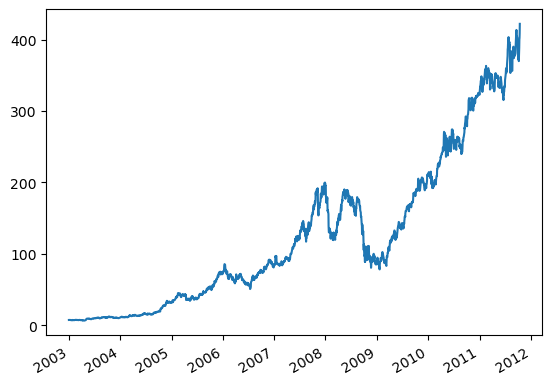

In [142]:
# 现在我介绍rolling算子，它的行为与resample和groupby类似。rolling可以在Series或DataFrame上通过一个window（以一个区间的数字来表示，参见图11-4）进行调用。
close_px.AAPL.plot()

<Axes: >

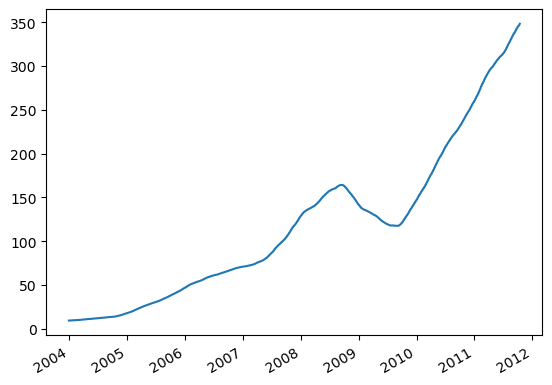

In [143]:
close_px.AAPL.rolling(250).mean().plot()

In [145]:
# 表达式rolling(250)与groupby的行为类似，但是它创建的对象是根据250日滑动窗口分组的而不是直接分组。因此这里我们获得了苹果公司股票价格的250日移动窗口平均值。
# 默认情况下，滚动函数需要窗口中所有的值必须是非NA值。由于存在缺失值这种行为会发生改变，尤其是在时间序列的起始位置你拥有的数据是少于窗口区间的（见图11-5）：
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Name: AAPL, dtype: float64

<Axes: >

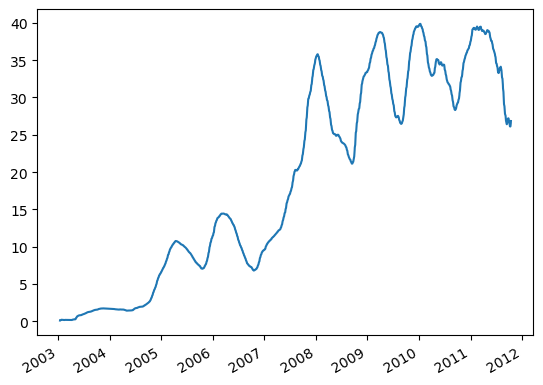

In [146]:
appl_std250.plot()

In [147]:
# 为了计算扩展窗口均值，使用expanding算子，而不是rolling。扩展均值从时间序列的起始位置开始时间窗口，并增加窗口的大小，直到它涵盖整个序列。apple_std250的扩展均值窗口如下
expanding_mean=appl_std250.expanding().mean()

<Axes: >

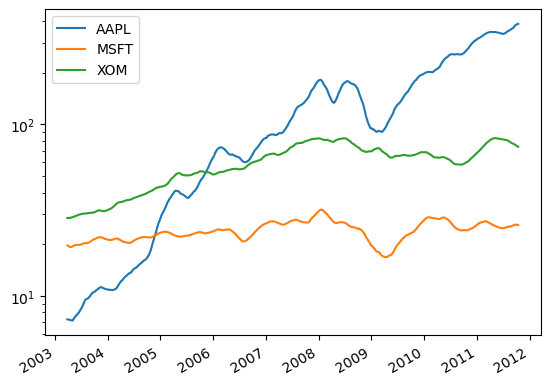

In [148]:
# 在DataFrame上调用一个移动窗口函数会将变换应用到每一列上
close_px.rolling(60).mean().plot(logy=True)

In [149]:
# rolling函数也接收表示固定大小的时间偏置字符串，而不只是一个区间的集合数字。对不规则时间序列使用注释非常有用。这些字符串可以传递给resample。例如，我们可以像这样计算20天的滚动平均值：
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


TypeError: 'module' object is not callable

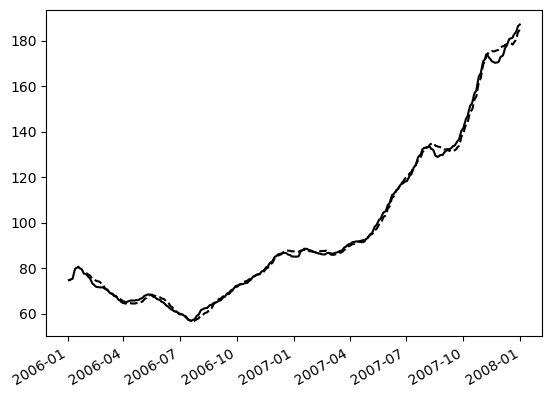

In [157]:
# 11.7.1指数加权函数
# 指定一个常数衰减因子以向更多近期观测值提供更多权重，可以替代使用具有相等加权观察值的静态窗口尺寸的方法。有多种方式可以指定衰减因子。其中一种流行的方式是使用一个span（跨度），这使得结果与窗口大小等于跨度的简单移动窗口函数。
# 由于指数加权统计值给更近期的观测值以更多的权重，与等权重的版本相比，它对变化“适应”得更快。
# pandas拥有ewm算子，同rolling、expanding算子一起使用。以下是将苹果公司股票价格的60日均线与span=60的EW移动平均线进行比较的例子（见图11-7）：
import matplotlib as plt
appl_px=close_px.AAPL['2006':'2007']
ma60=appl_px.rolling(30,min_periods=20).mean()
ewma60=appl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

<Axes: >

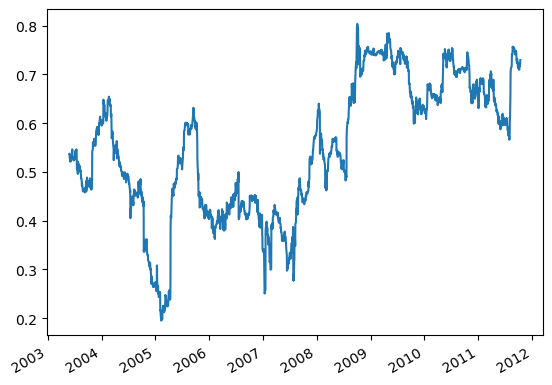

In [159]:
# 11.7.2 二元移动窗口函数
# 一些统计算子，例如相关度和协方差，需要操作两个时间序列。例如，金融分析师经常对股票与基准指数（如标普500）的关联性感兴趣。为了了解这个功能，我们首先计算所有我们感兴趣的时间序列的百分比变化：
spx_px=close_px_all['SPX']
spx_rests=spx_px.pct_change()
returns=close_px.pct_change()
# 在我们调用rolling后，corr聚合函数可以根据spx_rets计算滚动相关性（见图11-8）：
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rests)
corr.plot()

<Axes: >

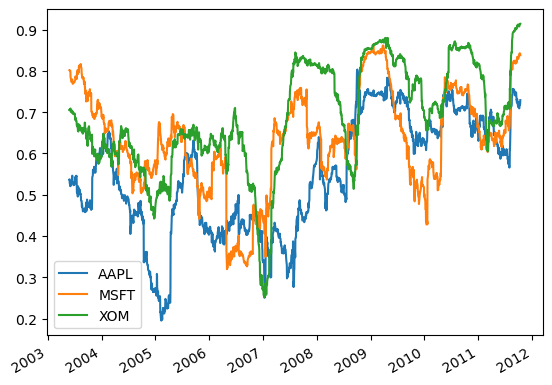

In [160]:
# 假设你想要一次性计算多只股票与标普500的相关性。编写循环并创建一个新的DataFrame是简单的但可能也是重复性的，所以如果你传递了一个Series或一个DataFrame，像rolling_corr这样的函数将会计算Series（例子中的spx_rets）与DataFrame中每一列的相关性（见图11-9）：
corr=returns.rolling(125,min_periods=100).corr(spx_rests)
corr.plot()

<Axes: >

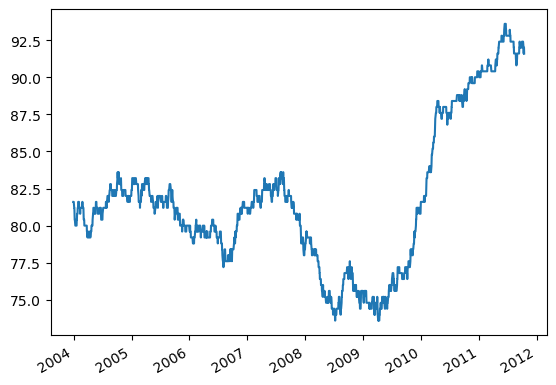

In [161]:
# 11.7.3用户自定义的移动窗口函数
# 在rolling及其相关方法上使用apply方法提供了一种在移动窗口中应用你自己设计的数组函数的方法。唯一的要求是该函数从每个数组中产生一个单值（缩聚）。例如，尽管我们可以使用rolling(...).quantile(q)计算样本的分位数，但我们可能会对样本中特定值的百分位数感兴趣。scipy.stats.percentileofscore函数就是实现这个功能的（见图11-10）：
from scipy.stats import  percentileofscore
score_at_2percent=lambda x:percentileofscore(x,0.02)
result=returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()